In [1]:
# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib inline


In [2]:
#pip install ffmpeg-python 

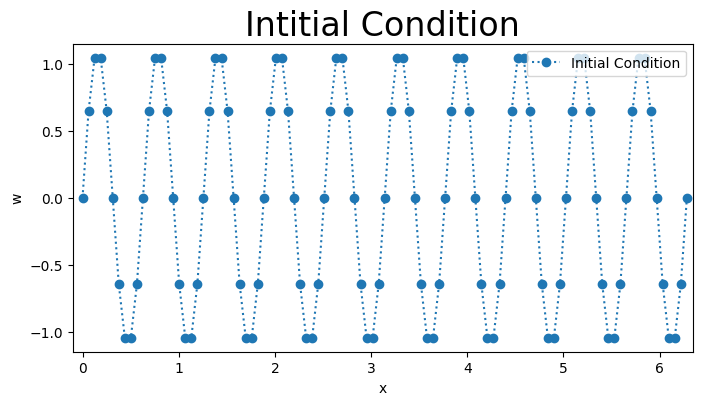

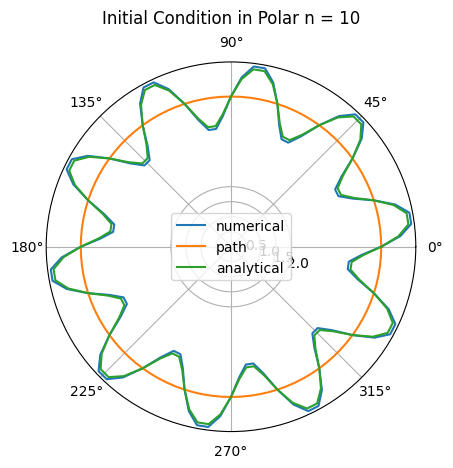

In [3]:
N = 100
Nt = 100
dx = 2 * np.pi / N
dt = 1 / Nt
r = dt / (dx * dx)
time_steps = 400
time = np.arange(0, (time_steps + .5) * dt, dt)
x = np.arange(0, 2 * np.pi + dx / 2, dx)

w = np.zeros((N + 1, time_steps + 1))
# b = np.zeros(N - 1)

n = 10
# const = n*np.pi/2
const = 0
amp = 5
# Initial Condition
for i in range(0, N + 1):
#     w[i, 0] = 2 * np.sin(n*x[i] - const) * np.cos(n*x[i] - const)
    w[i, 0] = 1.1*np.sin(n*x[i] - const)

fig = plt.figure(figsize=(8, 4))
plt.subplot(111)
plt.plot(x, w[:, 0], 'o:', label='Initial Condition')
plt.xlim([-0.1, max(x) + dx])
plt.title('Intitial Condition', fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x, amp + w[:, 0], label = 'numerical')
ax.plot(x, amp*np.ones(len(x)), label = 'path')
ax.plot(x, amp + np.sin(n*x - const), label = 'analytical')
# ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.legend()

ax.set_title(f"Initial Condition in Polar n = {n}", va='bottom')
plt.show()

In [4]:
lamba = dt / dx
ipos = np.zeros(N + 1)
ineg = np.zeros(N + 1)
for j in range(0, time_steps):
    for i in range(0, N + 1):
        w[i, j + 1] = w[i, j] - lamba / 2 * (
            w[int(ipos[i]), j] - w[int(ineg[i]), j]) + lamba * lamba / 2 * (
                w[int(ipos[i]), j] - 2 * w[i, j] + w[int(ineg[i]), j]) / 2

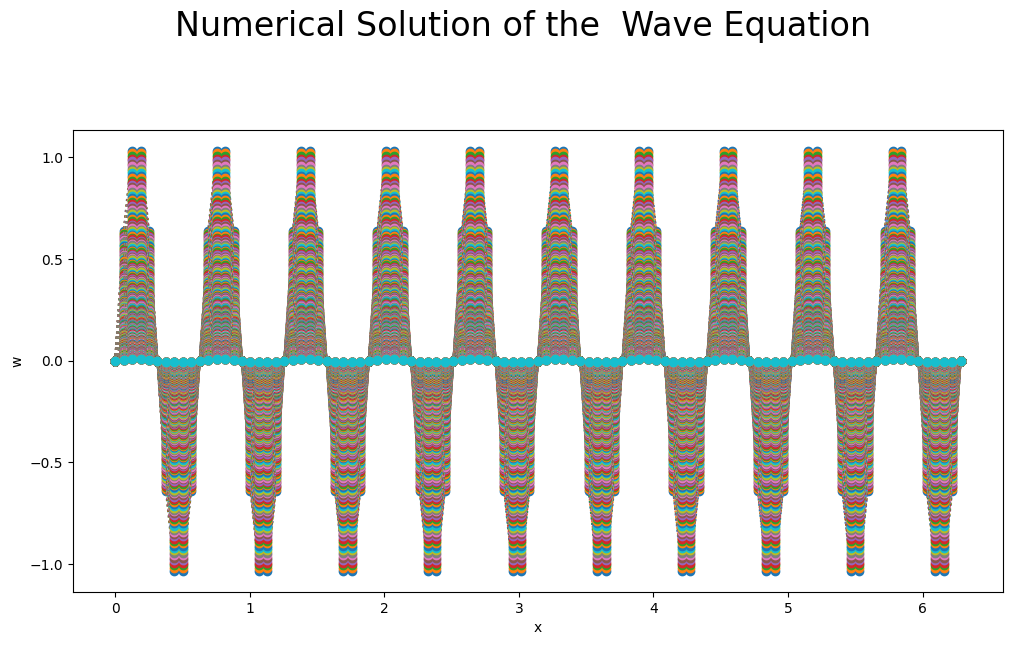

In [5]:
fig = plt.figure(figsize=(12, 6))

# plt.subplot(121)
plt.subplot(111)
for j in range(1, time_steps + 1):
    plt.plot(x, w[:, j], 'o:')
plt.xlabel('x')
#plt.xticks(np.arange(len(x)), np.round(x,3),rotation=45)
plt.ylabel('w')

# plt.subplot(122)
# plt.imshow(w.transpose(), aspect='auto')
# plt.xticks(np.arange(len(x)), np.round(x,3),rotation=45)
# plt.yticks(np.arange(len(time)), np.round(time,2))
# plt.xlabel('x')
# plt.ylabel('time')
# clb=plt.colorbar()
# clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Wave Equation' % (np.round(r, 3)),
             fontsize=24,
             y=1.08)
# fig.tight_layout()
plt.show()

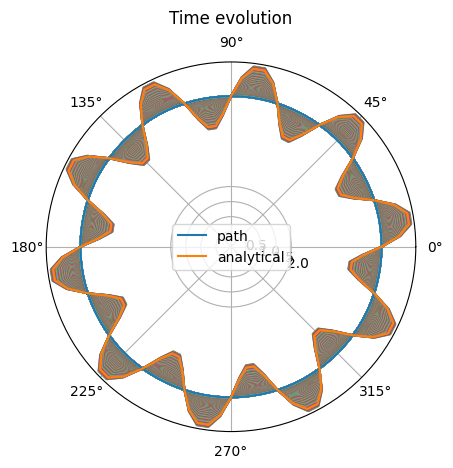

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for j in range(1, time_steps + 1):
    ax.plot(x, amp + w[:, j])
# ax.set_rmax(2)
ax.plot(x, amp*np.ones(len(x)), label = 'path')
ax.plot(x, amp + np.sin(n*x), label = 'analytical')
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.legend()
ax.set_title("Time evolution", va='bottom')
plt.show()